In [1]:
import pandas as pd

In [22]:
df = pd.read_csv("jre.csv")
df = df.drop(columns=["Unnamed: 0"])

In [23]:
df.head(5)

,pod_num,guest,transcript
0,1104,Boyan Slat,"Ladies and gentlemen, welcome to the show. Ho..."
1,1105,Michael Hunter,"Hey everybody, how the fuck are ya? Huh? Huh?..."
2,1106,Colion Noir,hey ladies gentlemen how's the thing this epi...
3,1107,Sam Harris & Maajid Nawaz,hey you friends what's going on this episode ...
4,1108,Peter Attia,late and gentlemen how's everyone doing I'm d...


In [24]:
len(df)

280

In [43]:
guests = df.groupby("guest").size()
reocurring_guests = guests.where(guests > 1).dropna()
reocurring_guests.sort_values(ascending=False)

guest
Tom Papa              4.0
Tim Dillon            4.0
Mike Baker            4.0
Tony Hinchcliffe      3.0
Lex Fridman           3.0
Theo Von              3.0
Duncan Trussell       3.0
Joey Diaz             3.0
Tom Green             2.0
Tim Pool              2.0
Tim Kennedy           2.0
Steven Rinella        2.0
Peter Schiff          2.0
Nikki Glaser          2.0
Mike Tyson            2.0
Andrew Santino        2.0
Kyle Dunnigan         2.0
Andrew Schulz         2.0
Gad Saad              2.0
Dr. Rhonda Patrick    2.0
Dr. Debra Soh         2.0
Donnell Rawlings      2.0
Colion Noir           2.0
Cameron Hanes         2.0
Brian Redban          2.0
Brendan Schaub        2.0
Bill Burr             2.0
Ben Greenfield        2.0
Jordan Peterson       2.0
dtype: float64

In [48]:
df.iloc[0]["transcript"]

' Ladies and gentlemen, welcome to the show. How\'s everyone doing? I hope you\'re groovy. I\'m pretty fucking fired up for today, got a double header today. double header today and two very interesting people. But before that, let\'s get to our sponsors. This episode of the podcast is brought you by The Cash App. Now, The Cash App has copy here that I could read, but one one of the best things about The Cash App that I could bring up to you guys is that allows you to buy Bitcoin. The Cash App is a free app, you downloaded from the Google Play store, or from the App Store for iPhones. ... and you can send and receive money with friends at family. It\'s very easy way to pay people back or get p-p-p-paid. But it\'s also great way to buy and sell Bitcoin. A lot of people are interested in Bitcoin but don\'t know exactly where to start. "What do I do? I get an app? How do I buy it?" The best thing about Bitcoin is... like what is Bitcoin up to right now, Jamie? $7,000 bucks or something li

In [71]:
def get_greeting(greeting):
    if "gentlemen" in greeting or "ladies" in greeting:
        return "ladies and gentlemen"
    elif "friends" in greeting:
        return "friends"
    elif "everybody" in greeting:
        return "everybody"
    elif "folks" in greeting:
        return "folks"
    else:
        return "other"

In [82]:
df["greeting"] = df["transcript"].str[:50]
df["greeting_name"] = df["greeting"].apply(get_greeting)

greeting_name
everybody                20
folks                     3
friends                 141
ladies and gentlemen     96
other                    20
dtype: int64

<AxesSubplot:xlabel='greeting_name'>

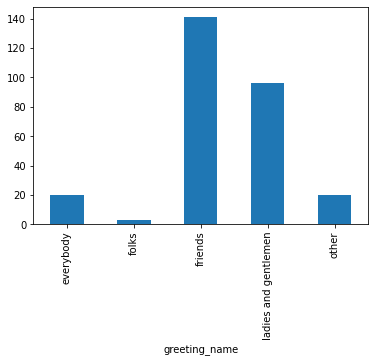

In [85]:
df.groupby("greeting_name").size().plot.bar()

In [78]:
df[df["greeting"].str.contains("motherfuking")]["greeting"]

7       this episode of the motherfuking podcast my c...
89      this episode of the motherfuking pop. Brought...
91      this episode of the motherfuking podcast is b...
102     it's the day before motherfuking Thanksgiving...
Name: greeting, dtype: object

In [79]:
for greeting in df[df["greeting_name"] == "other"]["greeting"]:
    print(greeting)

 this episode is brought to you by Onnit most of t
 this episode of the motherfuking podcast my compa
 Yo Boise Idaho we're coming to town baby! June 30
 I'm taking this show on the Madison area I can't 
 beautiful people of the world hi how you doing go
 he you fuckers Toronto oh shit Toronto coming in 
 hey Boise Idaho and other people but I'm going to
 hey buddy I got a bunch of tour dates coming up a
 I'm going to Tucson on Friday in Boise on Saturda
 I'm back I had to go I had to take some time off 
 raise in Toronto September 29th I've said this a 
 this episode of the podcast is brought to you by 
 this episode of the podcast is brought to you by 
 Netflix You Beautiful bastards Joey Diaz specials
 this episode of the motherfuking pop. Brought to 
 this episode of the motherfuking podcast is broug
 it's the day before motherfuking Thanksgiving and
 this episode of the podcast is brought to you by 
 Bishop so the podcast is brought to you by Square
   they  fit like designer jean

### TODO
- also compare results across different data sets, with/without ads, spell check, etc
- create df run spell check to correct speech to text errors
- create df without ads in transcripts
- check profanity on each pod, probability of entire transcript, then number of sentences with prob > .5
- sentiment analysis

### Resources
#### Profanity
- https://towardsdatascience.com/building-a-better-profanity-detection-library-with-scikit-learn-3638b2f2c4c2
- https://github.com/vzhou842/profanity-check